In [1017]:
#https://www.kaggle.com/arindam235/startup-investments-crunchbase
#https://support.crunchbase.com/hc/en-us/articles/115010458467-Glossary-of-Funding-Types
#https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-


import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv("investments_VC.csv")

In [145]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [148]:
df.shape

(54294, 39)

In [149]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [150]:
df.isin([0]).sum()

permalink                   0
name                        0
homepage_url                0
category_list               0
 market                     0
 funding_total_usd          0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

In [151]:
df.count()

permalink               49438
name                    49437
homepage_url            45989
category_list           45477
 market                 45470
 funding_total_usd      49438
status                  48124
country_code            44165
state_code              30161
region                  44165
city                    43322
funding_rounds          49438
founded_at              38554
founded_month           38482
founded_quarter         38482
founded_year            38482
first_funding_at        49438
last_funding_at         49438
seed                    49438
venture                 49438
equity_crowdfunding     49438
undisclosed             49438
convertible_note        49438
debt_financing          49438
angel                   49438
grant                   49438
private_equity          49438
post_ipo_equity         49438
post_ipo_debt           49438
secondary_market        49438
product_crowdfunding    49438
round_A                 49438
round_B                 49438
round_C   

In [152]:
df.nunique()

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
 market                   753
 funding_total_usd      14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [153]:
(df.isin([0]).sum()/df.count()) *100

permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
 market                  0.000000
 funding_total_usd       0.000000
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [154]:
df['status'].unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [155]:
df.groupby('status')['name'].nunique()

status
acquired      3691
closed        2602
operating    41762
Name: name, dtype: int64

In [156]:
df['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [157]:
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50) # most of the valyes are from USA 

country_code
USA    28756
GBR     2642
CAN     1405
CHN     1238
DEU      966
FRA      866
IND      849
ISR      681
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      283
KOR      246
CHE      222
DNK      210
FIN      194
ARG      149
BEL      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
TWN       41
HUN       41
THA       38
COL       35
PHL       32
LTU       31
GRC       31
PER       29
NGA       29
Name: name, dtype: int64

In [158]:
df[df['status'].isin(['acquired'])].mean()

funding_rounds          2.013814e+00
founded_year            2.003798e+03
seed                    1.783670e+05
venture                 1.385521e+07
equity_crowdfunding     2.406028e+03
undisclosed             1.559854e+05
convertible_note        6.423306e+03
debt_financing          1.905123e+06
angel                   6.677897e+04
grant                   2.570494e+04
private_equity          2.637853e+06
post_ipo_equity         1.611554e+06
post_ipo_debt           3.093987e+05
secondary_market        2.464789e+02
product_crowdfunding    7.313109e+02
round_A                 2.174661e+06
round_B                 3.425453e+06
round_C                 2.729664e+06
round_D                 1.539313e+06
round_E                 5.004732e+05
round_F                 1.511213e+05
round_G                 2.315818e+04
round_H                 0.000000e+00
dtype: float64

In [159]:
df[df['status'].isin(['closed'])].mean()

funding_rounds          1.434114e+00
founded_year            2.007276e+03
seed                    1.415031e+05
venture                 5.212253e+06
equity_crowdfunding     0.000000e+00
undisclosed             3.732560e+04
convertible_note        1.012430e+04
debt_financing          6.263045e+05
angel                   7.328595e+04
grant                   5.857066e+04
private_equity          5.576029e+05
post_ipo_equity         3.033922e+05
post_ipo_debt           0.000000e+00
secondary_market        2.821279e+03
product_crowdfunding    1.037265e+01
round_A                 1.064018e+06
round_B                 1.214834e+06
round_C                 6.584350e+05
round_D                 2.839396e+05
round_E                 2.428813e+05
round_F                 1.730695e+05
round_G                 1.920861e+04
round_H                 0.000000e+00
dtype: float64

In [160]:
df[df['status'].isin(['operating'])].mean()

funding_rounds          1.689522e+00
founded_year            2.007723e+03
seed                    2.275289e+05
venture                 7.194281e+06
equity_crowdfunding     6.984983e+03
undisclosed             1.304164e+05
convertible_note        2.587812e+04
debt_financing          1.989447e+06
angel                   6.554313e+04
grant                   1.811988e+05
private_equity          2.129350e+06
post_ipo_equity         5.075855e+05
post_ipo_debt           4.409116e+05
secondary_market        4.514165e+04
product_crowdfunding    8.176997e+03
round_A                 1.189144e+06
round_B                 1.361950e+06
round_C                 1.132962e+06
round_D                 7.145365e+05
round_E                 3.433617e+05
round_F                 1.763014e+05
round_G                 6.492200e+04
round_H                 1.682087e+04
dtype: float64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [162]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [163]:
df.isnull().sum()/df.count() *100 #around 40% of the data does not have a founded date

permalink                9.822404
name                     9.824625
homepage_url            18.058666
category_list           19.387822
 market                 19.406202
 funding_total_usd       9.822404
status                  12.821046
country_code            22.934450
state_code              80.013925
region                  22.934450
city                    25.326624
funding_rounds           9.822404
founded_at              40.825855
founded_month           41.089340
founded_quarter         41.089340
founded_year            41.089340
first_funding_at         9.822404
last_funding_at          9.822404
seed                     9.822404
venture                  9.822404
equity_crowdfunding      9.822404
undisclosed              9.822404
convertible_note         9.822404
debt_financing           9.822404
angel                    9.822404
grant                    9.822404
private_equity           9.822404
post_ipo_equity          9.822404
post_ipo_debt            9.822404
secondary_mark

In [164]:
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [165]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')

In [166]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

In [167]:
#need to work on this
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')

In [168]:
df[['founded_at', 'first_funding_at', 'last_funding_at', 'founded_year', 'founded_month', 'founded_quarter']]

,founded_at,first_funding_at,last_funding_at,founded_year,founded_month,founded_quarter
0,2012-06-01,2012-06-30,2012-06-30,2012-01-01,2012-06-01,2012-Q2
1,NaT,2010-06-04,2010-09-23,NaT,NaT,NaN
2,2012-10-26,2012-08-09,2012-08-09,2012-01-01,2012-10-01,2012-Q4
3,2011-04-01,2011-04-01,2011-04-01,2011-01-01,2011-04-01,2011-Q2
4,2014-01-01,2014-08-17,2014-09-26,2014-01-01,2014-01-01,2014-Q1
...,...,...,...,...,...,...
54289,NaT,NaT,NaT,NaT,NaT,NaN
54290,NaT,NaT,NaT,NaT,NaT,NaN
54291,NaT,NaT,NaT,NaT,NaT,NaN
54292,NaT,NaT,NaT,NaT,NaT,NaN


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     49438 non-null  float64       
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [172]:
df.groupby('status')['funding_total_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


In [173]:
df.groupby('status')['funding_rounds'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [180]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].mean().T

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
funding_total_usd,2.075578e+07,7.023194e+06,1.295244e+07
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


In [179]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].median().T

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,2.0,1.0,1.0
funding_total_usd,6000000.0,500000.0,999857.0
seed,0.0,0.0,0.0
venture,5000000.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [181]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].sum().T

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,7.435000e+03,3.733000e+03,7.067100e+04
funding_total_usd,7.663035e+10,1.828137e+10,5.417878e+11
seed,6.585308e+08,3.683325e+08,9.517305e+09
venture,5.115343e+10,1.356749e+10,3.009296e+11
equity_crowdfunding,8.883057e+06,0.000000e+00,2.921749e+08
undisclosed,5.758979e+08,9.715853e+07,5.455188e+09
convertible_note,2.371484e+07,2.635356e+07,1.082456e+09
debt_financing,7.033715e+09,1.630271e+09,8.321657e+10
angel,2.465479e+08,1.907633e+08,2.741604e+09
grant,9.490263e+07,1.524594e+08,7.579363e+09


In [190]:
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at']

In [197]:
df['diff_funding'].describe()

count                          49428
mean     312 days 11:05:24.253459576
std      624 days 19:13:46.845677584
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                382 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding, dtype: object

In [201]:
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'M')

In [202]:
df['diff_funding_months'].describe()

count    49428.000000
mean        10.265906
std         20.527772
min          0.000000
25%          0.000000
50%          0.000000
75%         12.550566
max        567.962381
Name: diff_funding_months, dtype: float64

In [208]:
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']

df['total_investment'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: total_investment, dtype: float64

In [276]:
df['total_investment'].sum()

650933703144.0

In [209]:
df['funding_total_usd'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [275]:
df['funding_total_usd'].sum()

650933703144.0

In [219]:
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(20)

market
 Biotechnology           7.337295e+10
 Mobile                  4.947011e+10
 Software                4.222348e+10
 Clean Technology        3.761994e+10
 Health Care             2.946608e+10
 E-Commerce              2.240839e+10
 Enterprise Software     1.929719e+10
 Finance                 1.737230e+10
 Hardware + Software     1.281293e+10
 Advertising             1.266066e+10
 Semiconductors          1.234175e+10
 Health and Wellness     1.220653e+10
 Web Hosting             1.072166e+10
 Technology              1.010378e+10
 Curated Web             9.587998e+09
 Internet                9.369624e+09
 Games                   9.356133e+09
 Manufacturing           8.731243e+09
 Analytics               7.986746e+09
 Security                7.208829e+09
Name: funding_total_usd, dtype: float64

In [227]:
df.groupby('market')['name'].count().sort_values(ascending = False).head(20)

market
 Software                4620
 Biotechnology           3688
 Mobile                  1983
 E-Commerce              1805
 Curated Web             1655
 Enterprise Software     1280
 Health Care             1207
 Clean Technology        1200
 Games                   1182
 Hardware + Software     1081
 Advertising             1064
 Health and Wellness      920
 Social Media             876
 Finance                  867
 Education                863
 Manufacturing            744
 Analytics                617
 Security                 526
 Semiconductors           507
 Consulting               483
Name: name, dtype: int64

In [224]:
df['region'].unique()

array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [226]:
df.groupby('region')['name'].count().sort_values(ascending = False).head(20)

region
SF Bay Area         6804
New York City       2577
Boston              1837
London              1588
Los Angeles         1389
Seattle              932
Washington, D.C.     785
Chicago              749
San Diego            700
Denver               636
Austin               620
Toronto              528
Tel Aviv             513
Atlanta              511
Paris                493
Newark               492
Beijing              482
Dallas               460
Philadelphia         425
Anaheim              384
Name: name, dtype: int64

In [229]:
df.groupby('founded_year')['name'].count().sort_values(ascending = False).head(20)

founded_year
2012-01-01    5211
2011-01-01    4904
2013-01-01    4044
2010-01-01    3773
2009-01-01    2979
2008-01-01    2348
2007-01-01    2331
2006-01-01    1807
2014-01-01    1469
2005-01-01    1418
2004-01-01    1156
2003-01-01     965
2000-01-01     888
2002-01-01     788
1999-01-01     758
2001-01-01     741
1998-01-01     437
1997-01-01     359
1996-01-01     304
1995-01-01     224
Name: name, dtype: int64

In [230]:
df.groupby('founded_year')['name'].count().sort_values(ascending = False).tail(20)

founded_year
1911-01-01    2
1910-01-01    2
1950-01-01    2
1902-01-01    2
1905-01-01    1
1908-01-01    1
1907-01-01    1
1917-01-01    1
1903-01-01    1
1918-01-01    1
1920-01-01    1
1925-01-01    1
1929-01-01    1
1938-01-01    1
1939-01-01    1
1941-01-01    1
1943-01-01    1
1944-01-01    1
1946-01-01    1
1936-01-01    1
Name: name, dtype: int64

In [235]:
df['founded_year'].unique()

array(['2012-01-01T00:00:00.000000000',                           'NaT',
       '2011-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1987-01-01T00:00:00.000000000',
       '1989-01-01T00:00:00.000000000', '1979-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1988-01-01

<AxesSubplot:>

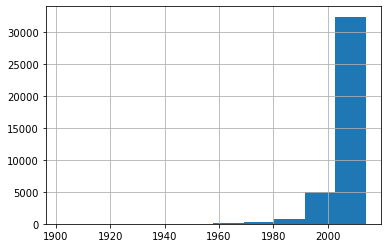

In [236]:
df['founded_year'].hist()

In [241]:
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])/np.timedelta64(1, 'M')

In [242]:
df['diff_first_funding_months'].describe()

count    38547.000000
mean        46.535082
std        111.273323
min       -576.143247
25%          4.993942
50%         17.938767
75%         49.019487
max       2752.385059
Name: diff_first_funding_months, dtype: float64

In [273]:
df.select_dtypes(include='number').columns

Index(['funding_total_usd', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'diff_funding', 'diff_funding_months', 'total_investment',
       'diff_first_funding_months'],
      dtype='object')

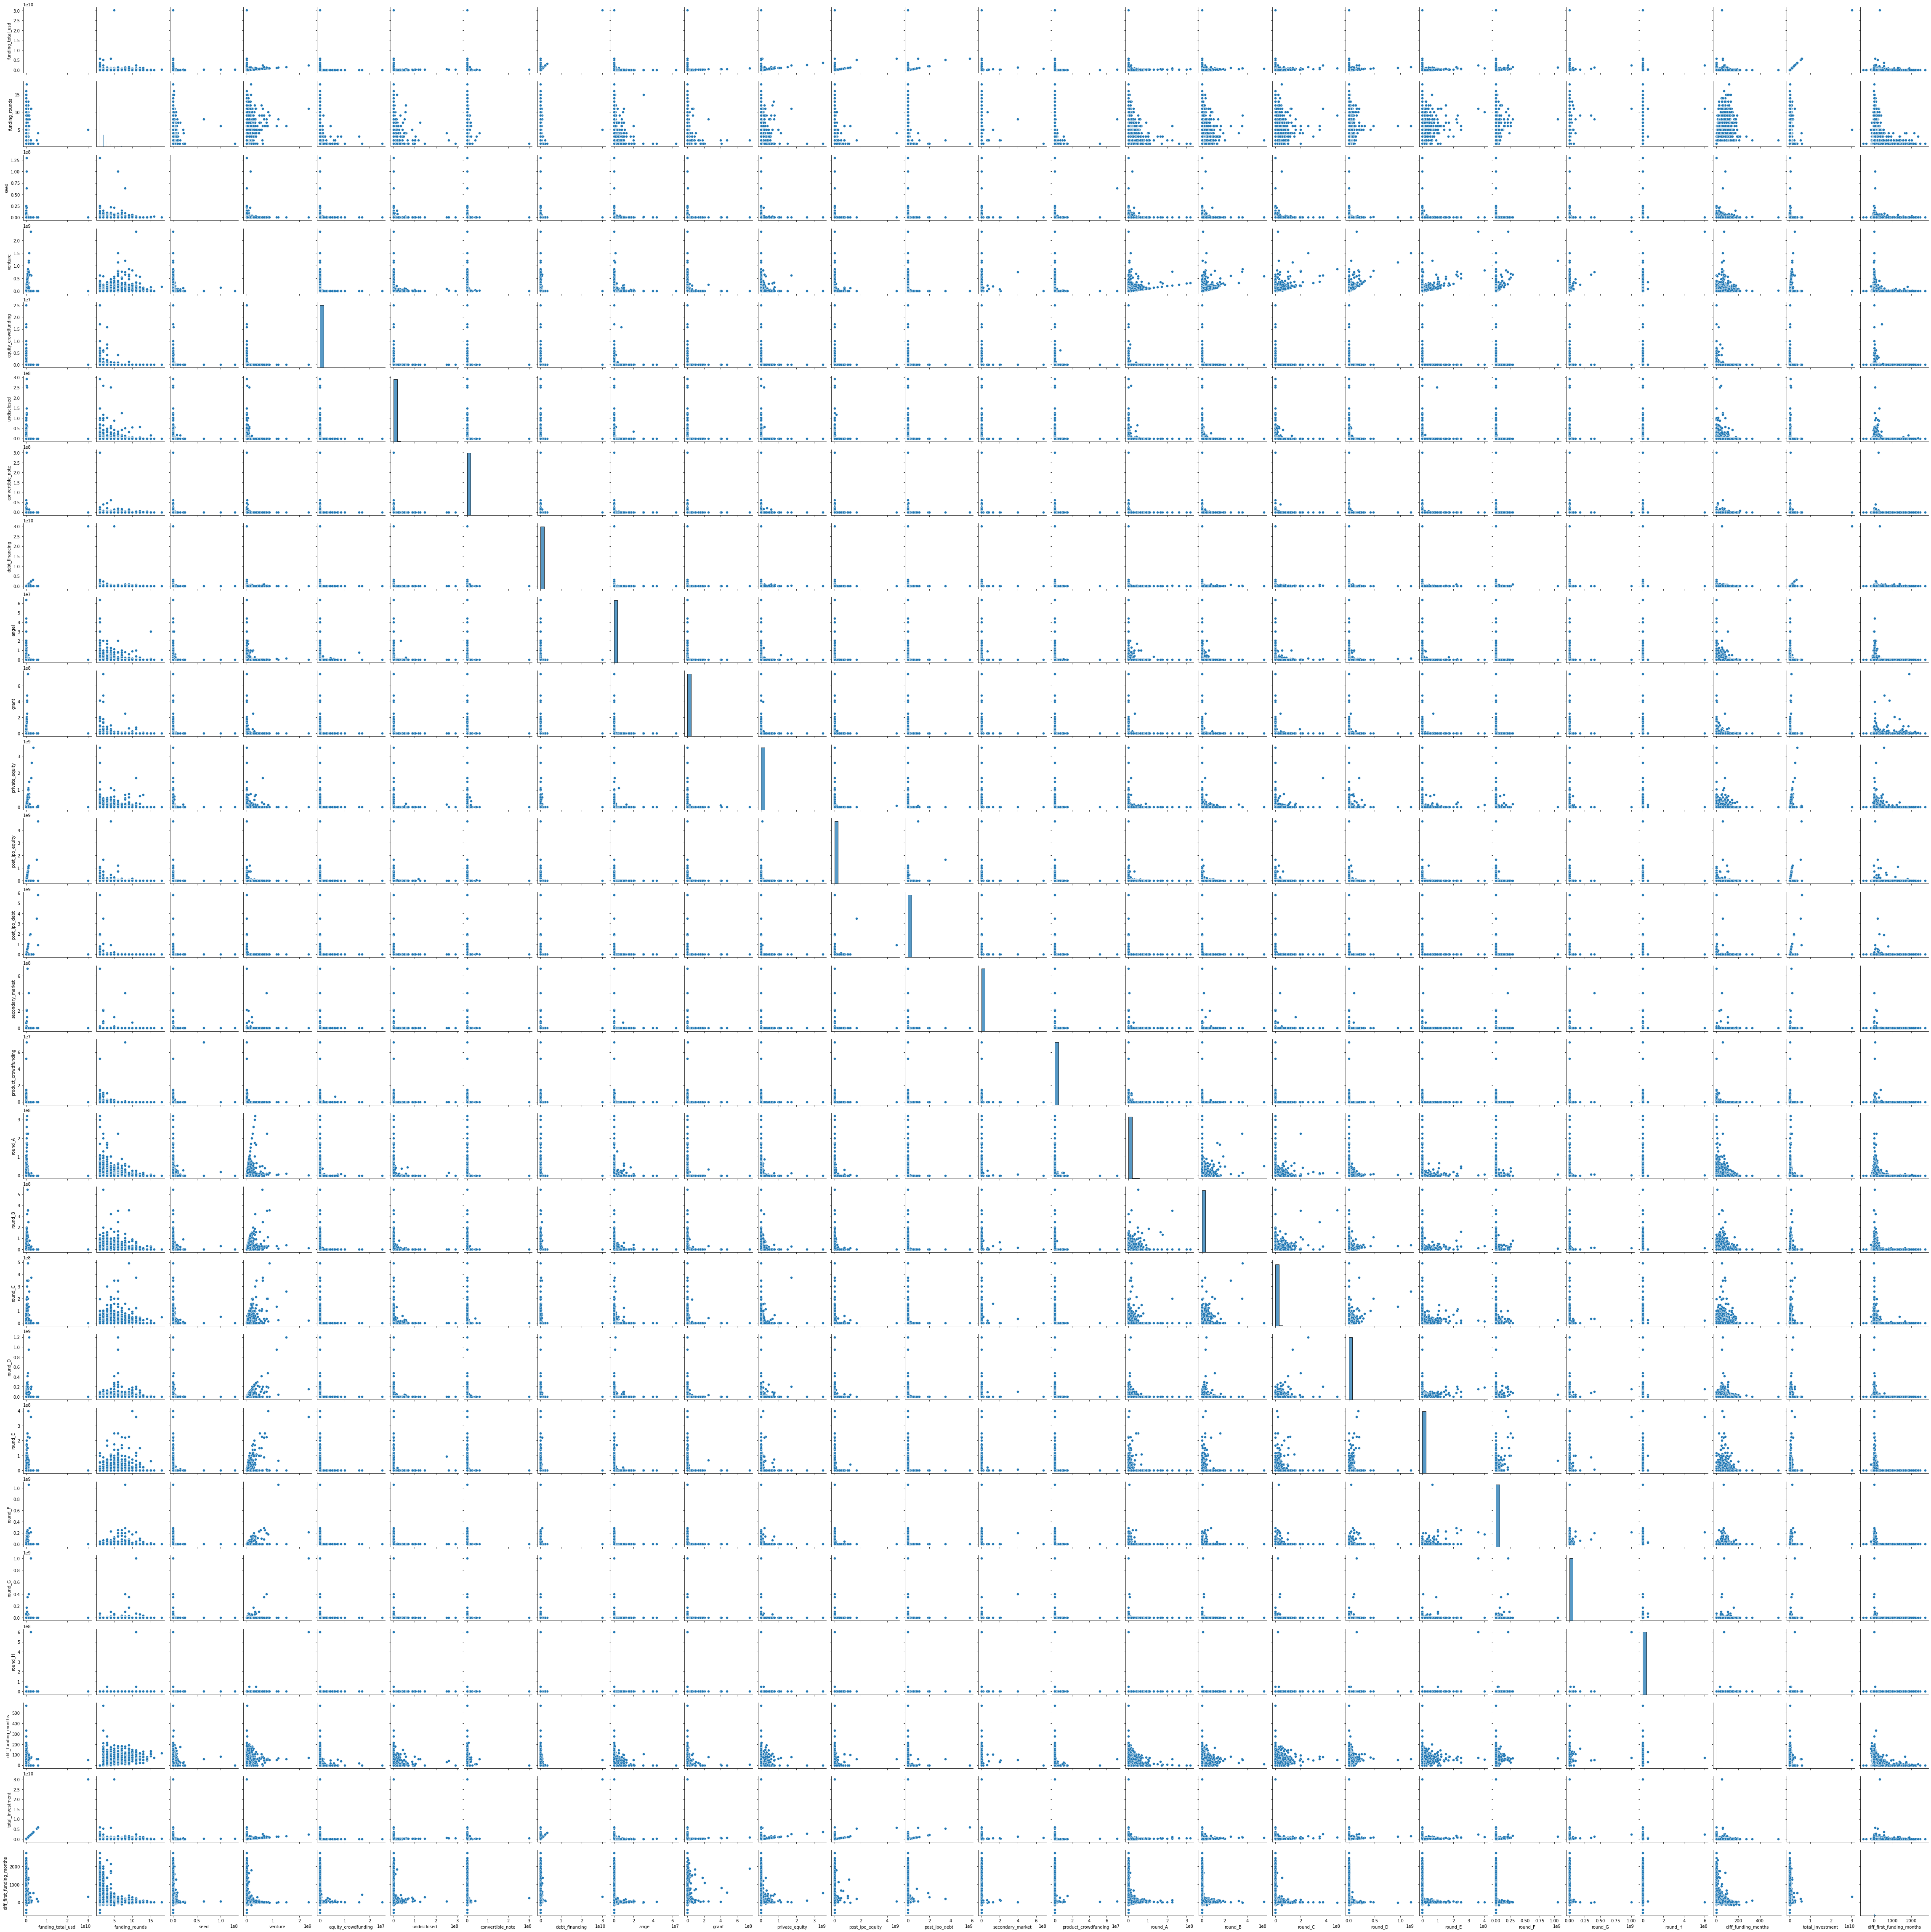

In [274]:
#sns.pairplot(df, hue='status', size=2.5)
sns.pairplot(df.select_dtypes(include='number'))

In [281]:
df[df['name'].isnull()].T

,28221,49438,49439,49440,49441,49442,49443,49444,49445,49446,...,54284,54285,54286,54287,54288,54289,54290,54291,54292,54293
permalink,/organization/tell-it-in,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
name,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
homepage_url,http://tellitin10.com,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
category_list,|Startups|,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
market,Startups,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
funding_total_usd,25000.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
status,closed,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
country_code,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
state_code,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
region,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [840]:
df1 = df.copy()

In [841]:
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])

In [842]:
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment'],
      dtype='object')

In [843]:
df1.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
market,News,Games,Publishing,Electronics,Tourism
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
funding_rounds,1.0,2.0,1.0,1.0,2.0
seed,1750000.0,0.0,40000.0,1500000.0,0.0
venture,0.0,4000000.0,0.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0,0.0,60000.0
undisclosed,0.0,0.0,0.0,0.0,0.0


In [844]:
df1.isnull().sum()

permalink                4856
name                     4857
market                   8824
status                   6170
country_code            10129
funding_rounds           4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
diff_funding_months      4866
total_investment         4856
dtype: int64

In [845]:
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code'])

In [846]:
df1.isnull().sum()

permalink               0
name                    0
market                  0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
diff_funding_months     6
total_investment        0
dtype: int64

In [847]:
df1.head()

,permalink,name,market,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,diff_funding_months,total_investment
0,/organization/waywire,#waywire,News,acquired,USA,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1750000.0
1,/organization/tv-communications,&TV Communications,Games,operating,USA,2.0,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.646892,4000000.0
2,/organization/rock-your-paper,'Rock' Your Paper,Publishing,operating,EST,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,40000.0
3,/organization/in-touch-network,(In)Touch Network,Electronics,operating,GBR,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1500000.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,Tourism,operating,USA,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.314195,60000.0


In [848]:
df1['market'].nunique()

736

In [849]:
df1['country_code'].nunique()

113

In [850]:
df1.shape

(40477, 29)

In [851]:
df1.groupby(df1['status'])['permalink'].count().sort_values(ascending = True).head(50)

status
closed        2146
acquired      3353
operating    34978
Name: permalink, dtype: int64

In [852]:
df1.groupby(df1['market'])['permalink'].count().sort_values(ascending = False).head(50)

market
 Software                 4242
 Biotechnology            3458
 Mobile                   1702
 E-Commerce               1529
 Curated Web              1397
 Enterprise Software      1192
 Health Care              1129
 Clean Technology         1077
 Games                    1017
 Hardware + Software      1008
 Advertising               943
 Health and Wellness       849
 Education                 767
 Finance                   767
 Social Media              728
 Manufacturing             654
 Analytics                 563
 Security                  479
 Semiconductors            462
 Consulting                452
 Hospitality               421
 Web Hosting               404
 Real Estate               358
 Fashion                   344
 News                      333
 Travel                    313
 Messaging                 259
 Search                    251
 Medical                   249
 Music                     241
 SaaS                      235
 Technology                231
 

In [853]:
df1.groupby(df1['country_code'])['permalink'].count().sort_values(ascending = False).head(50)

country_code
USA    26546
GBR     2459
CAN     1280
CHN     1198
DEU      904
IND      800
FRA      788
ISR      656
ESP      509
SWE      296
IRL      278
AUS      277
NLD      273
ITA      271
SGP      267
BRA      243
JPN      242
CHL      219
KOR      205
CHE      202
RUS      199
FIN      177
DNK      177
BEL      145
ARG      130
TUR      116
HKG      111
AUT       97
NOR       92
POL       88
BGR       65
MEX       63
ARE       59
PRT       59
NZL       58
ZAF       50
CZE       47
MYS       47
IDN       47
EST       43
TWN       40
UKR       38
HUN       37
THA       36
PHL       31
GRC       31
LTU       29
COL       27
NGA       26
ROM       22
Name: permalink, dtype: int64

In [854]:
df1.groupby(df1['diff_funding_months'])['permalink'].count().sort_values(ascending = False).head(50)

diff_funding_months
0.000000     24728
11.992033       93
5.026797        43
7.983737        37
13.010534       36
14.029036       35
3.022649        35
9.987885        35
24.016920       32
23.984065       32
13.996181       31
4.008296        31
5.946734        31
15.014682       30
11.006386       30
12.024888       29
18.990123       29
10.973531       28
8.969383        28
1.018501        28
16.033183       27
4.961087        27
7.589478        26
16.000329       26
14.981827       26
6.965235        25
17.938767       25
8.016592        25
12.977679       25
6.045299        24
9.002238        24
7.030945        23
2.004148        23
20.961416       23
10.020740       23
8.049447        23
16.657426       22
6.998090        22
9.955030        22
13.109099       22
10.053595       22
12.419146       22
7.950882        22
6.012444        21
17.018830       21
19.975770       21
11.959178       21
22.998419       21
20.994271       21
25.035422       20
Name: permalink, dtype: int64

In [855]:
df1['diff_funding_year'] = round(df1['diff_funding_months']/12)

In [856]:
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50)

diff_funding_year
0.0     26349
1.0      4611
2.0      3443
3.0      2156
4.0      1500
5.0       982
6.0       566
7.0       377
8.0       207
9.0       133
10.0       54
11.0       37
12.0       22
13.0       14
15.0        7
14.0        4
16.0        3
17.0        2
18.0        1
23.0        1
28.0        1
47.0        1
Name: permalink, dtype: int64

In [857]:
df1.groupby(df1['diff_funding_months'] ==0)['permalink'].count().sort_values(ascending = False)

diff_funding_months
True     24728
False    15749
Name: permalink, dtype: int64

In [858]:
print(df1.groupby(df['market'])['permalink'].count().median())
print(df1.groupby(df['market'])['permalink'].count().mean())
print(df1.groupby(df['country_code'])['permalink'].count().median())
print(df1.groupby(df['country_code'])['permalink'].count().mean())

8.5
54.99592391304348
16.0
358.20353982300884


In [859]:
country = df1.groupby(df1['country_code'])['permalink'].count().reset_index()
country.groupby(country['permalink']>16).count()

,country_code,permalink
permalink,,
False,57,57
True,56,56


In [860]:
market = df1.groupby(df1['market'])['permalink'].count().reset_index()
market.groupby(market['permalink']>55).count()

,market,permalink
permalink,,
False,651,651
True,85,85


In [861]:
#df1 = df1[df1.groupby('country_code').country_code.transform('count') > 16] # removing this
#df1 = df1[df1.groupby('market').market.transform('count') > 55] # dont need this
df1.shape

(40477, 30)

In [862]:
df1.market = df1.market.str.strip() #removing space from beginnning and end of column

In [863]:
print(df1['market'].nunique())
print(df1['country_code'].nunique())

736
113


In [864]:
df1.groupby(df1['market'])['permalink'].count().reset_index().sort_values(by = ['market'],ascending = True).head(50)

,market,permalink
0,3D,18
1,3D Printing,9
2,3D Technology,7
3,Accounting,17
4,Ad Targeting,12
5,Advanced Materials,2
6,Adventure Travel,5
7,Advertising,943
8,Advertising Exchanges,2
9,Advertising Networks,2


In [865]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [866]:

df1['Industry_Group'] = pd.np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Givernment and Military", 
                               pd.np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate fro

In [867]:
df1['Industry_Group'].unique()

array(['Content and Publishing', 'Gaming', 'Consumer Electronics',
       'Travel and Tourism', 'Advertising', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Internet Services', 'Food and Beverage',
       'Media and Entertainment', 'Data and Analytics',
       'Clothing and Apparel', 'Other', 'Biotechnology',
       'Community and Lifestyle', 'Sports', 'Mobile', 'Manufacturing',
       'Design', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Professional Services',
       'Administrative Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security',
       'Sales and Marketing', 'Natural Resources', 'Consumer Goods',
       'Events', 'Energy', 'Platforms', 'Apps', 'Science and Engineering',
       'Givernment and Military', 'Agriculture and Farming',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [868]:
df1['Industry_Group'].nunique()

43

In [869]:
df1.groupby(by = ['Industry_Group', 'market']).count()

permalink  name  status  \
Industry_Group          market                                          
Administrative Services B2B Express Delivery          1     1       1   
                        College Recruiting            3     3       3   
                        Content Delivery              9     9       9   
                        Corporate IT                  4     4       4   
                        Distribution                 14    14      14   
...                                                 ...   ...     ...   
Travel and Tourism      Online Travel                19    19      19   
                        Resorts                       1     1       1   
                        Tourism                      17    17      17   
                        Travel                      313   313     313   
                        Travel & Tourism             17    17      17   

                                              country_code  funding_rounds  \
Industry_Group          market                                               
Administrative Services B2B Express Delivery             1               1   
                        College Recruiting               3               3   
                        Content Delivery                 9               9   
                        Corporate IT                     4               4   
                        Distribution                    14              14   
...                                                    ...             ...   
Travel and Tourism      Online Travel                   19              19   
                        Resorts                          1               1   
                        Tourism                         17              17   
                        Travel                         313             313   
                        Travel & Tourism                17              17   

                                              seed  venture  \
Industry_Group          market                                
Administrative Services B2B Express Delivery     1        1   
                        College Recruiting       3        3   
                        Content Delivery         9        9   
                        Corporate IT             4        4   
                        Distribution            14       14   
...                                            ...      ...   
Travel and Tourism      Online Travel           19       19   
                        Resorts                  1        1   
                        Tourism                 17       17   
                        Travel                 313      313   
                        Travel & Tourism        17       17   

                                              equity_crowdfunding  \
Industry_Group          market                                      
Administrative Services B2B Express Delivery                    1   
                        College Recruiting                      3   
                        Content Delivery                        9   
                        Corporate IT                            4   
                        Distribution                           14   
...                                                           ...   
Travel and Tourism      Online Travel                          19   
                        Resorts                                 1   
                        Tourism                                17   
                        Travel                                313   
                        Travel & Tourism                       17   

                                              undisclosed  convertible_note  \
Industry_Group          market                                                
Administrative Services B2B Express Delivery            1                 1   
                        College Recruiting              3                 3   
                        Content Delivery       

In [870]:
df1[df1['Industry_Group'].isin(['Other'])]['market'].unique()

array(['Mobility', 'Carbon', 'Small and Medium Businesses', 'Nonprofits',
       'Incentives', 'Mass Customization', 'Collaboration',
       'Trusted Networks', 'Real Time', 'RIM', 'Consumers',
       'Crowdsourcing', 'Craigslist Killers', 'Enterprises', 'Non Profit',
       'Subscription Businesses', 'Genetic Testing', 'Testing',
       'Distributed Generation', 'Angels', 'Defense', 'Monetization',
       'Peer-to-Peer', 'Charity', 'Collaborative Consumption',
       'High Tech', 'B2B', 'Infrastructure', 'Gold',
       'General Public Worldwide', 'Licensing', 'World Domination',
       'Moneymaking', 'Emerging Markets', 'Bridging Online and Offline',
       'All Markets', 'Auto', 'Motors', 'Interest Graph',
       'Synchronization', 'Usability', 'Registrars', 'Freemium',
       'Enterprise Resource Planning', 'Exercise', 'Kinect', 'Surveys',
       'Rapidly Expanding', 'Mechanical Solutions', 'Bicycles',
       'Telephony', 'Families', 'Archiving', 'Offline Businesses',
       'Lotter

In [871]:
df1.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)

Industry_Group
Software                           8070
Biotechnology                      3494
Health Care                        2975
Internet Services                  2646
Commerce and Shopping              2267
Information Technology             1983
Mobile                             1800
Community and Lifestyle            1610
Advertising                        1548
Financial Services                 1267
Media and Entertainment            1236
Gaming                             1184
Professional Services               970
Education                           927
Data and Analytics                  911
Content and Publishing              815
Other                               796
Manufacturing                       690
Real Estate                         561
Privacy and Security                536
Sales and Marketing                 529
Transportation                      485
Travel and Tourism                  407
Clothing and Apparel                357
Consumer Electronics     

In [872]:
df1.groupby(by = ['Industry_Group', 'status'])['permalink'].count().sort_values(ascending = True).reset_index().head(50)

,Industry_Group,status,permalink
0,Sustainability,acquired,1
1,Science and Engineering,acquired,1
2,Food and Beverage,closed,1
3,Messaging and Telecommunication,closed,2
4,Administrative Services,closed,2
5,Sustainability,closed,2
6,Apps,acquired,2
7,Artificial Intelligence,operating,2
8,Givernment and Military,acquired,2
9,Energy,closed,3


<AxesSubplot:>

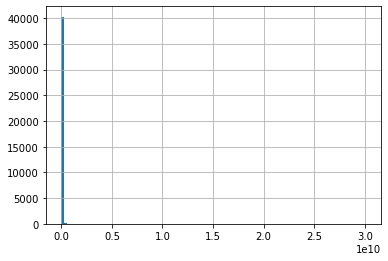

In [873]:
df1['total_investment'].hist(bins = 100)

In [874]:
df1['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'DNK', 'IND', 'SGP', 'IRL',
       'ITA', 'ISR', 'ESP', 'THA', 'RUS', 'NZL', 'BEL', 'CZE', 'CHE',
       'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR', 'CRI',
       'PRT', 'TWN', 'COL', 'NOR', 'UKR', 'LTU', 'ZAF', 'AUT', 'PHL',
       'ISL', 'BGR', 'HRV', 'JOR', 'VNM', 'GHA', 'PER', 'POL', 'IDN',
       'LVA', 'ALB', 'UGA', 'LBN', 'KHM', 'GRC', 'ARE', 'PAK', 'EGY',
       'SVK', 'LUX', 'MYS', 'MEX', 'BHS', 'ARM', 'MDA', 'DZA', 'TUN',
       'NIC', 'TZA', 'CYP', 'KEN', 'NPL', 'BHR', 'CMR', 'SRB', 'SAU',
       'CYM', 'BRN', 'SLV', 'PAN', 'ECU', 'MLT', 'SVN', 'TTO', 'MMR',
       'BGD', 'DOM', 'BMU', 'MAR', 'URY', 'LIE', 'GTM', 'AZE', 'MCO',
       'ZWE', 'UZB', 'OMN', 'BLR', 'JAM', 'KWT', 'MUS', 'CIV', 'SOM',
       'MKD', 'GIB', 'SYC', 'MAF', 'LAO'], dtype=object)

In [875]:
country = pd.read_csv('country.csv')
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
#country['Continent_Name'].unique()
#country['Three_Letter_Country_Code'].unique()
#country.isnull().sum()
country = country.dropna(how='any',axis=0) 
country.isnull().sum()

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [876]:
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [877]:
df1.groupby(by = ['Continent_Name'])['permalink'].count()

Continent_Name
Africa             175
Asia              4163
Europe            7535
North America    27929
Oceania            335
South America      649
Name: permalink, dtype: int64

In [878]:
df1.shape

(40786, 34)

array([[<AxesSubplot:title={'center':'funding_rounds'}>,
        <AxesSubplot:title={'center':'seed'}>,
        <AxesSubplot:title={'center':'venture'}>,
        <AxesSubplot:title={'center':'equity_crowdfunding'}>,
        <AxesSubplot:title={'center':'undisclosed'}>],
       [<AxesSubplot:title={'center':'convertible_note'}>,
        <AxesSubplot:title={'center':'debt_financing'}>,
        <AxesSubplot:title={'center':'angel'}>,
        <AxesSubplot:title={'center':'grant'}>,
        <AxesSubplot:title={'center':'private_equity'}>],
       [<AxesSubplot:title={'center':'post_ipo_equity'}>,
        <AxesSubplot:title={'center':'post_ipo_debt'}>,
        <AxesSubplot:title={'center':'secondary_market'}>,
        <AxesSubplot:title={'center':'product_crowdfunding'}>,
        <AxesSubplot:title={'center':'round_A'}>],
       [<AxesSubplot:title={'center':'round_B'}>,
        <AxesSubplot:title={'center':'round_C'}>,
        <AxesSubplot:title={'center':'round_D'}>,
        <AxesSubplot:t

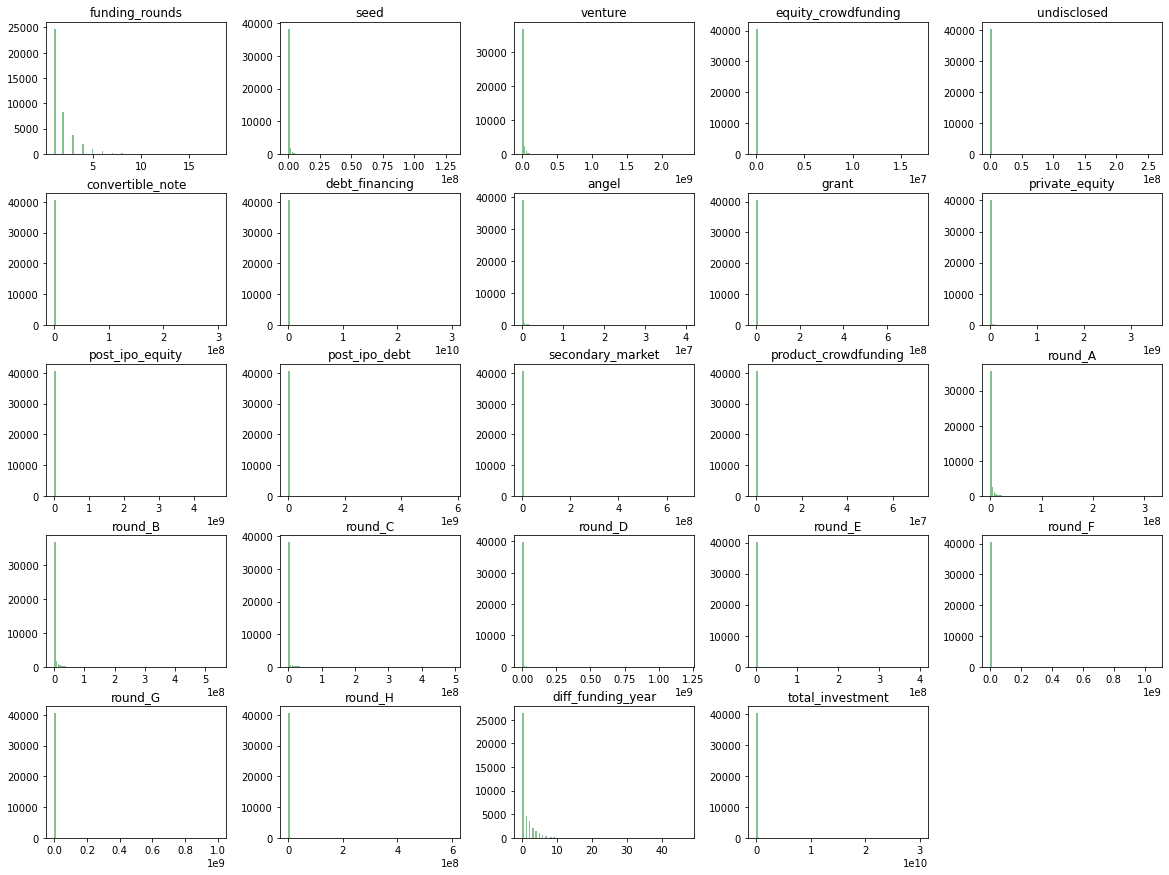

In [879]:
df1.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9)

In [880]:
df1.isin([0]).sum()

permalink                        0
name                             0
market                           0
status                           0
country_code                     0
funding_rounds                   0
seed                         29569
venture                      19961
equity_crowdfunding          40335
undisclosed                  40060
convertible_note             40294
debt_financing               36957
angel                        38075
grant                        39848
private_equity               39563
post_ipo_equity              40551
post_ipo_debt                40726
secondary_market             40770
product_crowdfunding         40612
round_A                      32544
round_B                      35657
round_C                      38066
round_D                      39534
round_E                      40286
round_F                      40618
round_G                      40754
round_H                      40782
diff_funding_months          24920
total_investment    

In [881]:
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [988]:
df2 = df1.copy()

In [989]:
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1)

In [990]:
df2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40786.0,1.791252e+00,1.368257e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40786.0,2.357427e+05,1.135924e+06,0.0,0.0,0.0,28000.0,1.300000e+08
venture,40786.0,8.538769e+06,3.074894e+07,0.0,0.0,85038.5,6000000.0,2.351000e+09
equity_crowdfunding,40786.0,5.863668e+03,1.699489e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40786.0,1.187870e+05,2.672249e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40786.0,2.700591e+04,1.575447e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40786.0,2.082023e+06,1.512596e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40786.0,6.823373e+04,5.750170e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40786.0,1.805272e+05,6.121272e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40786.0,2.303067e+06,3.407213e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [991]:
df2.columns

Index(['permalink', 'name', 'status', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name'],
      dtype='object')

In [992]:
cat_invest = pd.cut(df2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
df2.insert(0,'cat_total_investment',cat_invest)

In [993]:
cat_diff_funding_year = pd.cut(df2.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])
df2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)

In [994]:
cat_funding_rounds = pd.cut(df2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
df2.insert(0,'cat_funding_rounds',cat_funding_rounds)

In [995]:
cat_seed = pd.cut(df2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
df2.insert(0,'cat_seed',cat_seed)

In [996]:
cat_venture = pd.cut(df2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
df2.insert(0,'cat_venture',cat_venture)

In [997]:
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])

df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

In [998]:
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1


df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1


df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [999]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name'])
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group'])

In [1000]:
df2.columns

Index(['cat_venture', 'cat_seed', 'cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment', 'permalink', 'name',
       'status', 'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name', 'cat_status', 'cat_equity_crowdfunding',
       'cat_undisclosed', 'cat_convertible_note', 'cat_debt_financing',
       'cat_angel', 'cat_grant', 'cat_private_equity', 'cat_post_ipo_equity',
       'cat_post_ipo_debt', 'cat_secondary_market', 'cat_product_crowdfunding',
       'cat_round_A', 'cat_round_B', 'cat_round_C', 'cat_round_D',
       'cat_round_E', 'cat_round_F', 'cat_round_G', 'cat_round_H',
       'c

In [1010]:
df3 = df2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']]

df3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,3,0,0.0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,3,0,0.0,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,3,0,0.0,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,3,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,3,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1011]:
df3.dtypes

cat_status                    int64
cat_Industry_Group            int64
cat_Continent_Name            int64
cat_funding_rounds            int64
cat_diff_funding_year       float64
cat_total_investment          int64
cat_equity_crowdfunding     float64
cat_venture                   int64
cat_seed                      int64
cat_undisclosed             float64
cat_convertible_note        float64
cat_debt_financing          float64
cat_angel                   float64
cat_grant                   float64
cat_private_equity          float64
cat_post_ipo_equity         float64
cat_post_ipo_debt           float64
cat_secondary_market        float64
cat_product_crowdfunding    float64
cat_round_A                 float64
cat_round_B                 float64
cat_round_C                 float64
cat_round_D                 float64
cat_round_E                 float64
cat_round_F                 float64
cat_round_G                 float64
cat_round_H                 float64
dtype: object

In [1012]:
df3.isna().sum()

cat_status                  0
cat_Industry_Group          0
cat_Continent_Name          0
cat_funding_rounds          0
cat_diff_funding_year       6
cat_total_investment        0
cat_equity_crowdfunding     0
cat_venture                 0
cat_seed                    0
cat_undisclosed             0
cat_convertible_note        0
cat_debt_financing          0
cat_angel                   0
cat_grant                   0
cat_private_equity          0
cat_post_ipo_equity         0
cat_post_ipo_debt           0
cat_secondary_market        0
cat_product_crowdfunding    0
cat_round_A                 0
cat_round_B                 0
cat_round_C                 0
cat_round_D                 0
cat_round_E                 0
cat_round_F                 0
cat_round_G                 0
cat_round_H                 0
dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

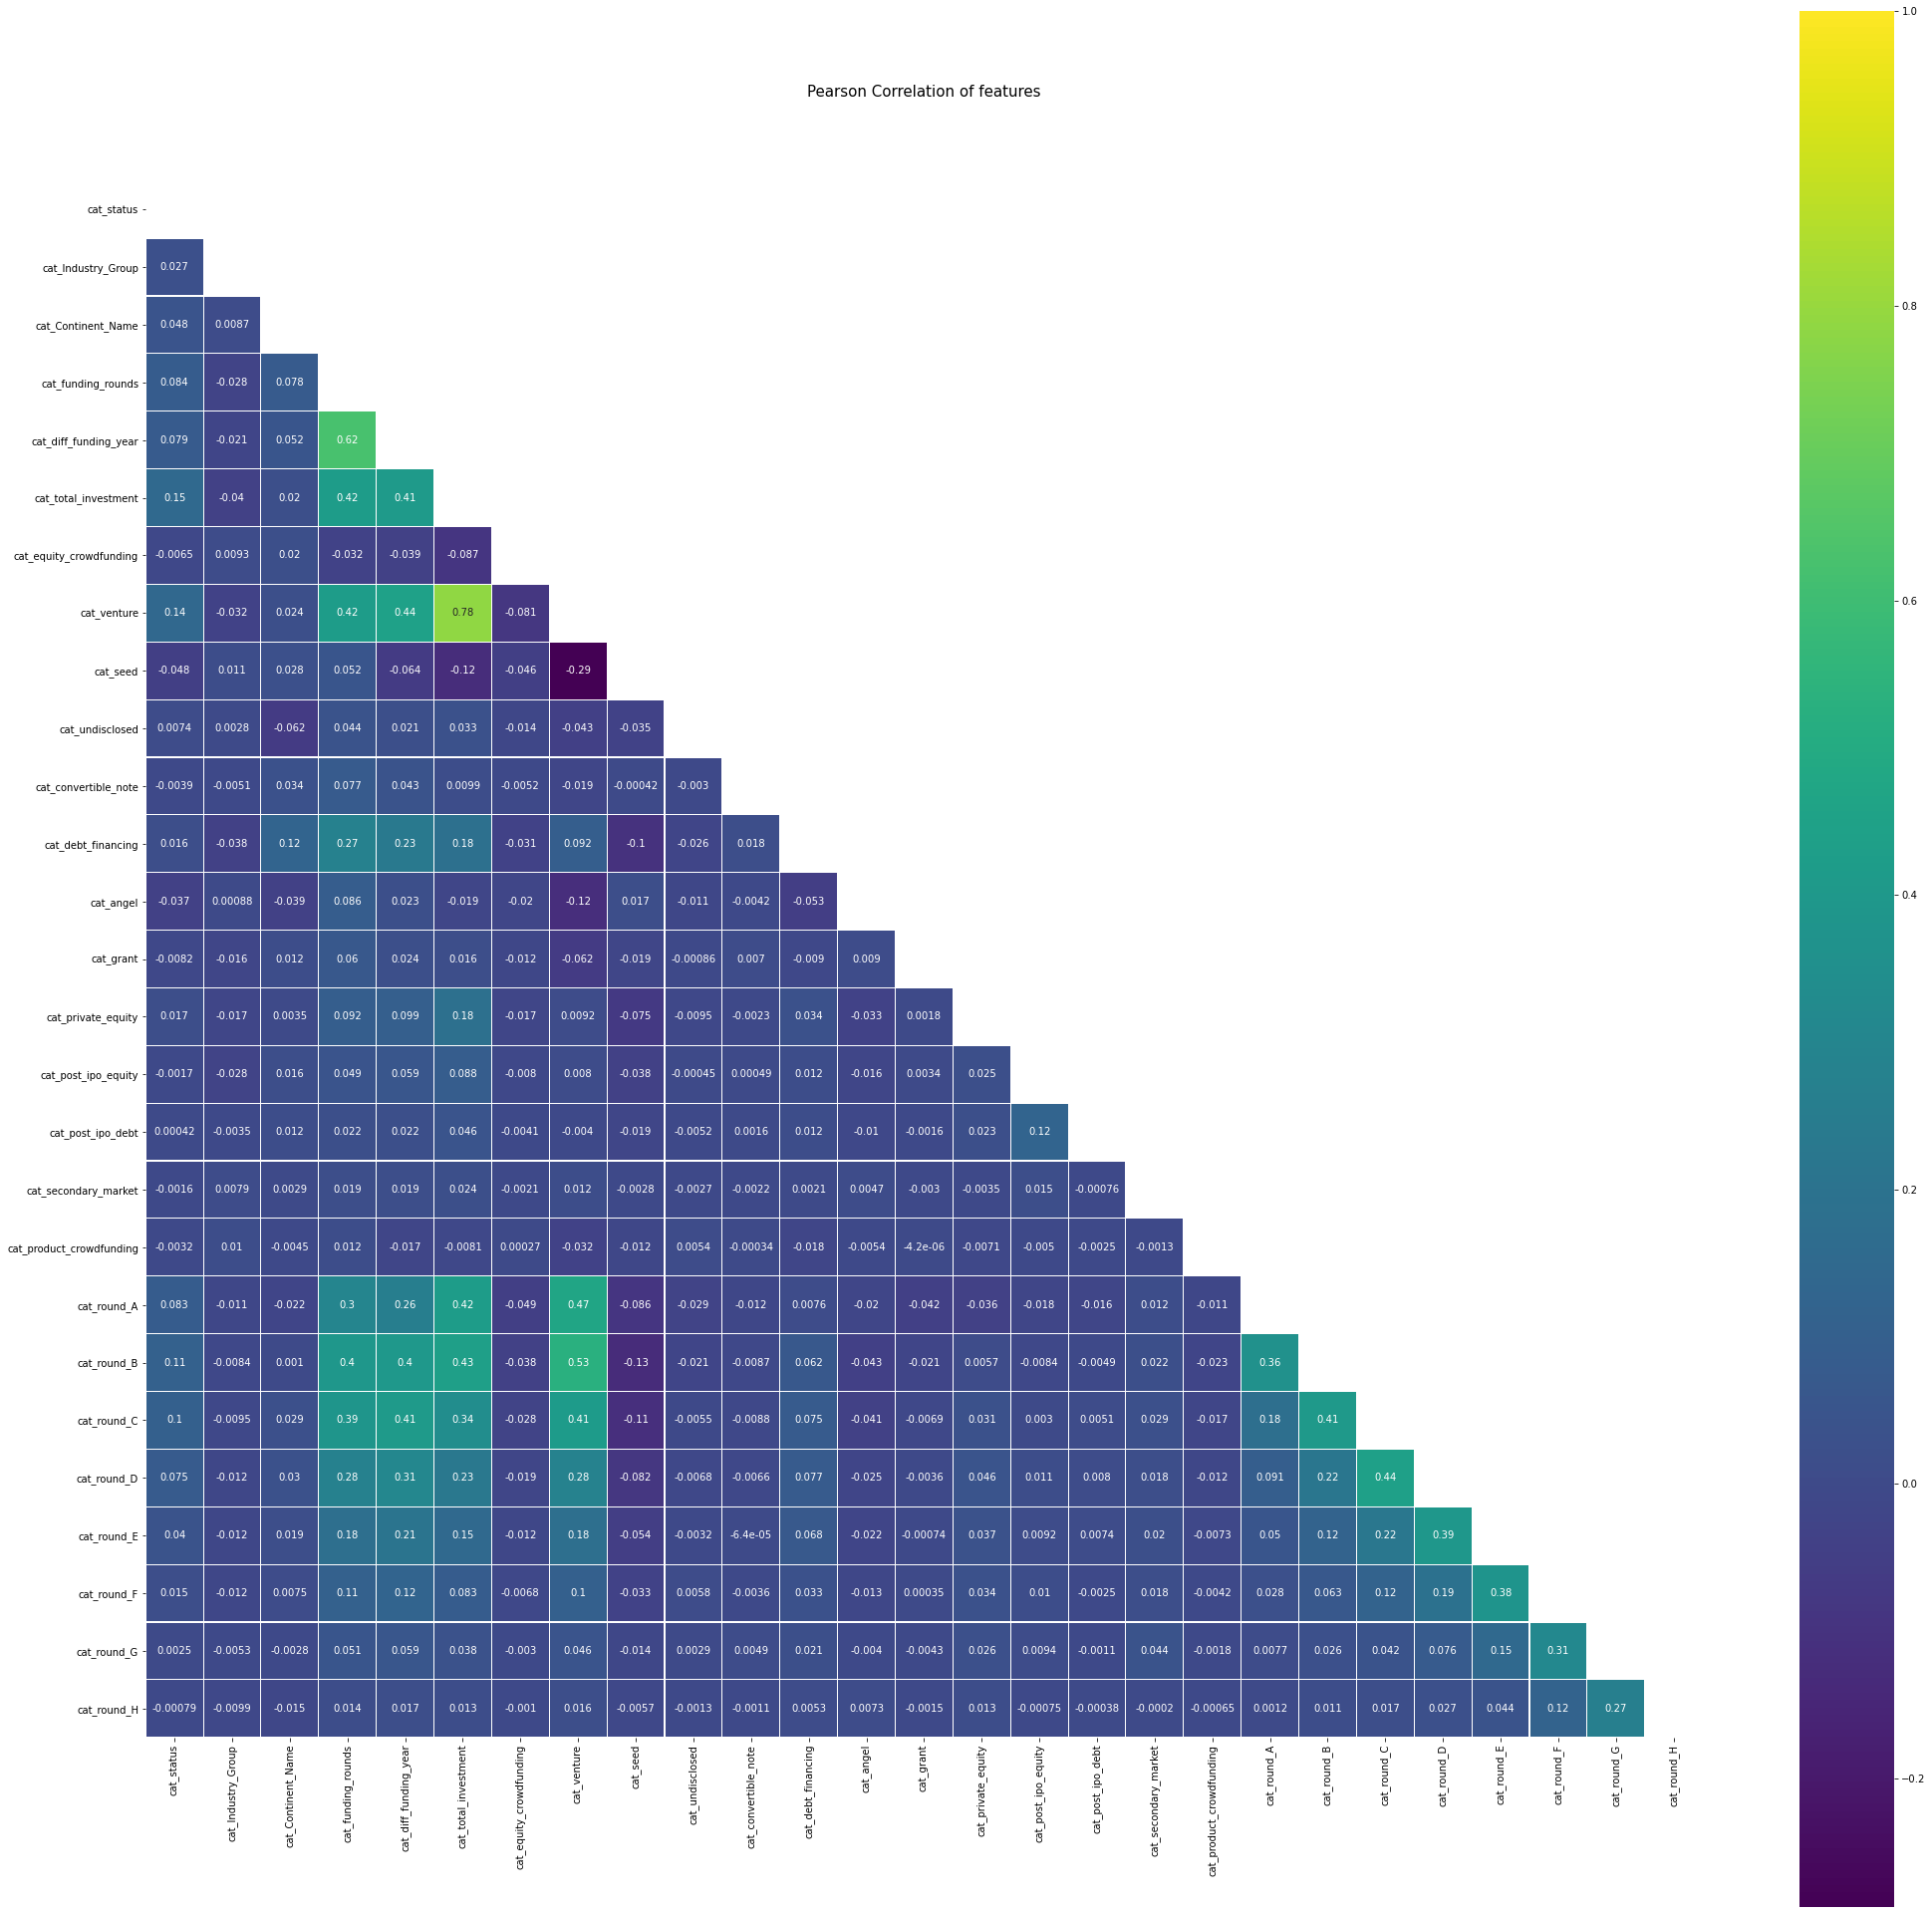

In [1015]:
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

#you can remove cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant , cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H

In [1018]:
df3.columns

Index(['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H'],
      dtype='object')

In [1022]:
df3.shape

(40786, 27)

In [1052]:
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # you can use this dataset

df4.shape

(40786, 17)

In [1036]:
X = df3.iloc[:,1:26].values
Y = df3.iloc[:,0].values

In [1037]:
X_std = StandardScaler().fit_transform(X)


In [1043]:
Y

array([2, 1, 1, ..., 0, 2, 1])

In [1041]:
X_std[0]

array([-0.91466043,  0.47799143, -0.48400033, -0.41907361,  0.44725745,
       -0.10574193, -0.81514874,  1.73380788, -0.13462101, -0.11050002,
       -0.32188025, -0.26683623, -0.15342571, -0.17582014, -0.07612602,
       -0.03838307, -0.01981024, -0.06545569, -0.50324659, -0.37926603,
       -0.26731038, -0.1779577 , -0.11140583, -0.0643125 , -0.0280214 ])

In [1048]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1053]:
np.any(np.isnan(X_std))

True